# Approaching Categorical Prediction via Classification Algorithm with Pycaret - Mortality Example

## Install pycaret library

In [ ]:
# pycaret setup
!pip install pycaret

## import numpy, pandas and pycaret libraries

In [ ]:
# import packages
import numpy as np
import pandas as pd
import pycaret
import io

## Data load

In [ ]:
# data load
data_path_url = "https://docs.google.com/spreadsheets/d/1dxuxnsBGATOruCOmNogVElQJ7zd8oFep/edit?usp=share_link&ouid=115767054129572266797&rtpof=true&sd=true"
data_path_url_for_pandas = data_path_url.replace("/edit?usp=share_link&ouid=115767054129572266797&rtpof=true&sd=true", "/export?format=xlsx")
df = pd.read_excel(data_path_url_for_pandas)
# display all columns
pd.set_option("display.max_columns", None)

## data - main features

In [ ]:
# display first 5 rows
df.head(5)

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.65,0.40,13.3,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,NaN,NaN,NaN,NaN,NaN,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.10,0.55,24.5,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.80,0.15,14.5,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,NaN,NaN,NaN,NaN,NaN,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [ ]:
# data features
df.describe(include = 'all')

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,976.000000,976.000000,975.000000,976.000000,976.000000,804.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,971.000000,969.000000,969.000000,971.000000,965.000000,971.000000,961.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,859.000000,760.000000,859.000000,964.000000,964.000000,976.000000,843.000000,976.000000,976.000000,967.000000,976.000000,976.000000,975.000000,976.000000,976.000000,976.000000,769.000000,976.000000,847.000000,762.000000,976.000000
mean,1.257172,150757.118852,0.147692,74.237705,1.521516,30.332536,0.721311,0.457992,0.081967,0.430328,0.319672,0.116803,0.384221,0.344262,0.074795,84.938012,118.012377,59.634653,20.839630,36.683182,96.293198,1906.614464,32.088001,3.598807,29.517661,32.874125,89.804781,15.926480,10.773416,239.783818,80.003027,0.404232,12.249533,17.658908,1.646796,10665.494706,261.467566,1.591038,35.814683,150.946393,4.174245,138.868791,8.491447,102.340598,13.927410,2.124343,7.378812,26.828120,1.941298,45.311831,48.773566
std,0.437299,29133.806387,0.354977,13.367655,0.499793,9.727841,0.448584,0.498488,0.274455,0.495376,0.466589,0.321350,0.486660,0.475371,0.263195,16.316167,17.131843,10.530329,4.051414,0.622599,2.334017,1288.546334,5.193199,0.627753,2.667230,1.421057,6.617960,2.135802,5.199286,114.916602,11.039781,0.431359,8.428228,7.385888,0.840127,12825.820774,1621.591509,1.200860,21.523283,52.532084,0.419868,4.223113,0.583699,5.404074,2.646458,0.258723,0.067369,5.261467,1.002372,12.897634,13.010487
min,1.000000,100213.000000,0.000000,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,75.000000,24.736842,11.137931,33.250000,75.916667,0.000000,20.311111,2.030000,18.125000,27.825000,62.600000,12.088889,0.100000,9.571429,5.000000,0.100000,0.966667,10.100000,0.900000,50.000000,8.000000,0.266667,5.357143,70.222222,3.000000,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,1.000000,125368.250000,0.000000,66.000000,1.000000,24.221453,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.664132,105.608696,52.258065,17.916667,36.285714,94.963528,980.000000,28.314286,3.150357,28.197500,31.990057,86.075000,14.465909,7.495833,165.017857,74.625000,0.200000,6.565714,13.200000,1.150000,2114.250000,46.916667,0.933333,20.588889,115.083333,3.898333,136.618750,8.138750,99.057692,12.250000,1.955556,7.335000,23.356061,1.300000,37.000000,40.000000
50%,1.000000,151981.500000,0.000000,78.000000,2.000000,28.296143,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.961538,116.178571,58.764706,20.325000,36.666667,96.500000,1640.000000,30.950000,3.538750,29.752778,33.017424,90.000000,15.486607,9.842727,222.583333,82.150000,0.300000,10.500000,14.710000,1.300000,5319.000000,90.000000,1.275000,30.436508,137.600000,4.111111,139.177083,8.487500,102.500000,13.689904,2.091667,7.380000,26.333333,1.700000,42.568182,55.000000
75%,2.000000,176121.500000,0.000000,85.000000,2.000000,33.878312,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,96.480000,128.173913,65.695652,23.496753,37.031746,97.962912,2545.000000,35.333929,3.923125,31.240714,33.845833,93.666667,16.904167,12.815152,301.468750,87.325000,0.500000,15.500000,19.092857,1.763542,14543.375000,185.875000,1.822222,44.446429,171.250000,4.400000,141.6942

In [ ]:
# number of unique values
df.nunique()

group                         2
ID                          976
outcome                       2
age                          66
gendera                       2
BMI                         786
hypertensive                  2
atrialfibrillation            2
CHD with no MI                2
diabetes                      2
deficiencyanemias             2
depression                    2
Hyperlipemia                  2
Renal failure                 2
COPD                          2
heart rate                  922
Systolic blood pressure     925
Diastolic blood pressure    912
Respiratory rate            863
temperature                 682
SP O2                       747
Urine output                714
hematocrit                  894
RBC                         893
MCH                         801
MCHC                        707
MCV                         559
RDW                         727
Leucocyte                   836
Platelets                   907
Neutrophils                 562
Basophil

In [ ]:
# types of variables
df.dtypes

group                         int64
ID                            int64
outcome                     float64
age                           int64
gendera                       int64
BMI                         float64
hypertensive                  int64
atrialfibrillation            int64
CHD with no MI                int64
diabetes                      int64
deficiencyanemias             int64
depression                    int64
Hyperlipemia                  int64
Renal failure                 int64
COPD                          int64
heart rate                  float64
Systolic blood pressure     float64
Diastolic blood pressure    float64
Respiratory rate            float64
temperature                 float64
SP O2                       float64
Urine output                float64
hematocrit                  float64
RBC                         float64
MCH                         float64
MCHC                        float64
MCV                         float64
RDW                         

In [ ]:
# number of missing values in columns
df.isnull().sum()

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         172
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                    5
Systolic blood pressure       7
Diastolic blood pressure      7
Respiratory rate              5
temperature                  11
SP O2                         5
Urine output                 15
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 117
Basophil

In [ ]:
# percentage of missing values
df.isnull().sum()*100/len(df)

group                        0.000000
ID                           0.000000
outcome                      0.102459
age                          0.000000
gendera                      0.000000
BMI                         17.622951
hypertensive                 0.000000
atrialfibrillation           0.000000
CHD with no MI               0.000000
diabetes                     0.000000
deficiencyanemias            0.000000
depression                   0.000000
Hyperlipemia                 0.000000
Renal failure                0.000000
COPD                         0.000000
heart rate                   0.512295
Systolic blood pressure      0.717213
Diastolic blood pressure     0.717213
Respiratory rate             0.512295
temperature                  1.127049
SP O2                        0.512295
Urine output                 1.536885
hematocrit                   0.000000
RBC                          0.000000
MCH                          0.000000
MCHC                         0.000000
MCV         

In [ ]:
# outcome (dep var) has 1 missing value; we will drop the raw having missing value in the outcome column
# drop var == nan
missing_value_drop_var = ['outcome'] # assigning BaseExcess var
df = df.dropna(subset=missing_value_drop_var) # drop nan of dependent var with corresponding columns
# percentage of missing values of df_sepsis
df.isnull().sum()*100/len(df)

group                        0.000000
ID                           0.000000
outcome                      0.000000
age                          0.000000
gendera                      0.000000
BMI                         17.538462
hypertensive                 0.000000
atrialfibrillation           0.000000
CHD with no MI               0.000000
diabetes                     0.000000
deficiencyanemias            0.000000
depression                   0.000000
Hyperlipemia                 0.000000
Renal failure                0.000000
COPD                         0.000000
heart rate                   0.410256
Systolic blood pressure      0.615385
Diastolic blood pressure     0.615385
Respiratory rate             0.410256
temperature                  1.025641
SP O2                        0.410256
Urine output                 1.435897
hematocrit                   0.000000
RBC                          0.000000
MCH                          0.000000
MCHC                         0.000000
MCV         

In [ ]:
# display column (variable) names
df.columns

Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

### Target Variable = Outcome
### 0 - Alive
### 1 - Death

[data info](https://www.kaggle.com/datasets/saurabhshahane/in-hospital-mortality-prediction)

In [ ]:
# var = ID is excluded
selected_variables = ['group', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF']

In [ ]:
# display data with selected variables
df_mortality = df[selected_variables]
df_mortality

,group,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900000,16.220000,7.650000,305.100000,74.65,0.40,13.30,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,0.0,75,2,NaN,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200000,14.260000,12.740000,246.400000,NaN,NaN,NaN,NaN,NaN,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800000,23.820000,5.480000,204.200000,68.10,0.55,24.50,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625000,17.037500,8.225000,216.375000,81.80,0.15,14.50,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000000,16.266667,8.833333,251.000000,NaN,NaN,NaN,NaN,NaN,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,2,0.0,62,1,25.516870,1,1,0,1,0,1,1,1,0,100.125000,142.545455,69.681818,24.500000,37.055556,94.130435,NaN,33.628571,3.685714,27.842857,30.542857,91.142857,15.557143,7.742857,251.857143,81.55,0.70,10.65,12.600000,1.200000,47985.0,129.500000,8.385714,48.000000,120.000000,5.557143,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
972,2,0.0,78,1,25.822710,0,1,0,1,0,1,1,1,0,114.640000,101.222222,51.888889,18.958333,35.972222,93.526316,NaN,28.715789,3.270000,29.772727,33.263636,89.545455,18.672727,22.309091,283.000000,84.58,0.80,7.70,18.721429,1.692857,48044.0,34.000000,1.900000,34.500000,138.333333,4.520000,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
973,2,0.0,85,2,23.891779,1,1,0,1,1,0,0,1,0,52.720000,137.791667,40.958333,18.680000,36.777778,98.800000,118.0,27.685714,3.065714,26.900000,29.800000,90.285714,17.285714,9.228571,409.285714,65.90,0.40,24.40,13.000000,1.100000,50976.0,98.000000,2.728571,30.428571,99.000000,4.100000,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
974,2,0.0,79,2,35.288554,0,0,1,1,1,1,1,1,0,93.400000,94.416667,62.458333,22.040000,36.422222,99.560000,2585.0,33.537500,3.446250,31.150000,32.012500,97.375000,16.000000,6.062500,307.375000,79.85,0.30,13.20,16.442857,1.485714,59701.0,24.333333,1.736364,35.500000,135.166667,4.091667,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25


# Exploratory analysis with Autoviz

In [ ]:
# install autoviz

!pip install autoviz

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()
target_variable = 'outcome'
dft = AV.AutoViz(filename='',dfte=df_mortality, depVar=target_variable)

Output hidden; open in https://colab.research.google.com to view.

# Data preprocessign with pycaret

### We will impute missing values with KNN algorithm

In [ ]:
# import pycaret classification and init setup
from pycaret.classification import *
data = df_mortality
s = setup(data, target = 'outcome', session_id = 123,numeric_imputation = "knn",
          remove_multicollinearity = True, normalize = True, train_size = 0.8)

,Description,Value
0,Session id,123
1,Target,outcome
2,Target type,Binary
3,Original data shape,"(975, 50)"
4,Transformed data shape,"(975, 49)"
5,Transformed train set shape,"(780, 49)"
6,Transformed test set shape,"(195, 49)"
7,Numeric features,49
8,Rows with missing values,60.9%
9,Preprocess,True


In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8744,0.7890,0.3068,0.6967,0.4019,0.3472,0.3904,0.4360
ridge,Ridge Classifier,0.8705,0.0000,0.1939,0.7350,0.2919,0.2509,0.3214,0.1110
rf,Random Forest Classifier,0.8679,0.8100,0.1303,0.8250,0.2179,0.1882,0.2863,0.4770
lda,Linear Discriminant Analysis,0.8679,0.7870,0.3061,0.6025,0.3943,0.3325,0.3609,0.0710
et,Extra Trees Classifier,0.8667,0.8130,0.1045,0.6500,0.1733,0.1530,0.2318,0.1970
xgboost,Extreme Gradient Boosting,0.8654,0.7970,0.2811,0.5527,0.3631,0.3057,0.3318,0.1900
lightgbm,Light Gradient Boosting Machine,0.8628,0.8070,0.2280,0.5365,0.3104,0.2573,0.2897,1.3920
gbc,Gradient Boosting Classifier,0.8603,0.7887,0.2795,0.5562,0.3617,0.2959,0.3213,0.5700
knn,K Neighbors Classifier,0.8590,0.7029,0.1053,0.5083,0.1672,0.1364,0.1878,0.1120
qda,Quadratic Discriminant Analysis,0.8526,0.5976,0.1227,0.5083,0.1859,0.1412,0.1884,0.0670


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# create individually 2 best models
rf = create_model('rf')
lightgbm = create_model('lightgbm')
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8846,0.8684,0.1818,1.0000,0.3077,0.2763,0.4004
1,0.8718,0.7999,0.0909,1.0000,0.1667,0.1466,0.2813
2,0.8974,0.8148,0.2727,1.0000,0.4286,0.3918,0.4936
3,0.8462,0.7836,0.0000,0.0000,0.0000,-0.0241,-0.0462
4,0.8590,0.8019,0.0909,0.5000,0.1538,0.1155,0.1673
5,0.8590,0.7431,0.0833,1.0000,0.1538,0.1333,0.2673
6,0.8590,0.8037,0.0833,1.0000,0.1538,0.1333,0.2673
7,0.8590,0.7961,0.0833,1.0000,0.1538,0.1333,0.2673
8,0.8718,0.7955,0.2500,0.7500,0.3750,0.3229,0.3842


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8718,0.8969,0.1818,0.6667,0.2857,0.2398,0.3021
1,0.8462,0.8507,0.1818,0.4000,0.2500,0.1775,0.1947
2,0.9231,0.7870,0.5455,0.8571,0.6667,0.6256,0.6460
3,0.8718,0.7897,0.1818,0.6667,0.2857,0.2398,0.3021
4,0.8333,0.8168,0.2727,0.3750,0.3158,0.2236,0.2273
5,0.8462,0.7715,0.0833,0.5000,0.1429,0.1034,0.1556
6,0.8462,0.7399,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8462,0.7601,0.2500,0.5000,0.3333,0.2571,0.2770
8,0.8590,0.7980,0.2500,0.6000,0.3529,0.2886,0.3236


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9103,0.9335,0.4545,0.8333,0.5882,0.5427,0.5742
1,0.8974,0.8657,0.3636,0.8000,0.5000,0.4517,0.4955
2,0.8974,0.7910,0.5455,0.6667,0.6000,0.5419,0.5454
3,0.8462,0.6567,0.1818,0.4000,0.2500,0.1775,0.1947
4,0.8590,0.8480,0.2727,0.5000,0.3529,0.2814,0.2977
5,0.8462,0.7563,0.1667,0.5000,0.2500,0.1875,0.2231
6,0.8590,0.7753,0.0833,1.0000,0.1538,0.1333,0.2673
7,0.8590,0.6490,0.2500,0.6000,0.3529,0.2886,0.3236
8,0.8846,0.8182,0.2500,1.0000,0.4000,0.3607,0.4690


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
blender = blend_models([lr, lightgbm, rf])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8846,0.9254,0.1818,1.0000,0.3077,0.2763,0.4004
1,0.8718,0.8453,0.1818,0.6667,0.2857,0.2398,0.3021
2,0.9103,0.8019,0.4545,0.8333,0.5882,0.5427,0.5742
3,0.8590,0.7938,0.0909,0.5000,0.1538,0.1155,0.1673
4,0.8590,0.8304,0.2727,0.5000,0.3529,0.2814,0.2977
5,0.8462,0.7702,0.0833,0.5000,0.1429,0.1034,0.1556
6,0.8590,0.8119,0.0833,1.0000,0.1538,0.1333,0.2673
7,0.8590,0.7841,0.2500,0.6000,0.3529,0.2886,0.3236
8,0.8846,0.8157,0.2500,1.0000,0.4000,0.3607,0.4690


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
evaluate_model(blender)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

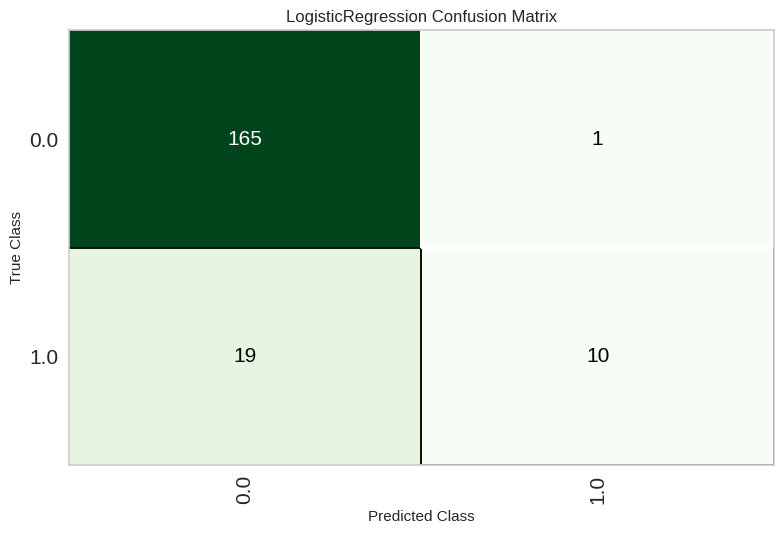

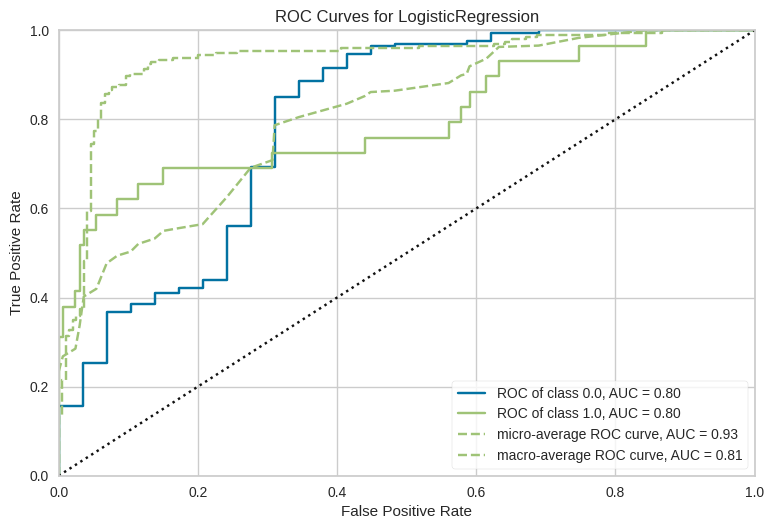

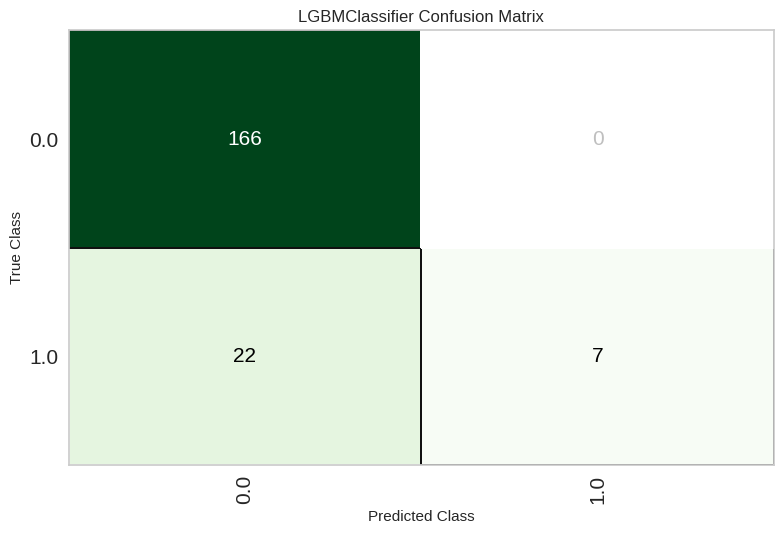

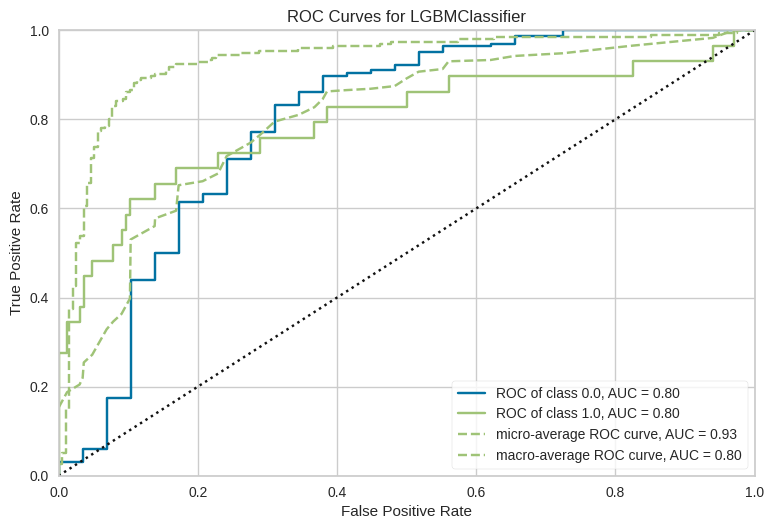

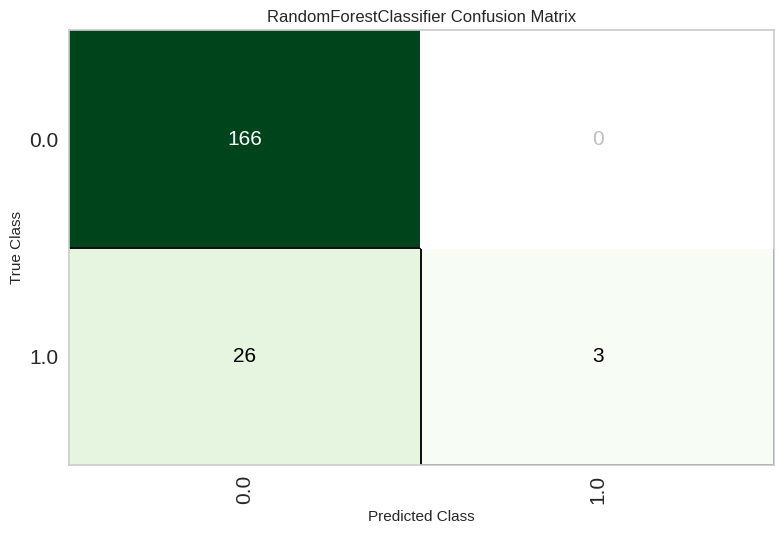

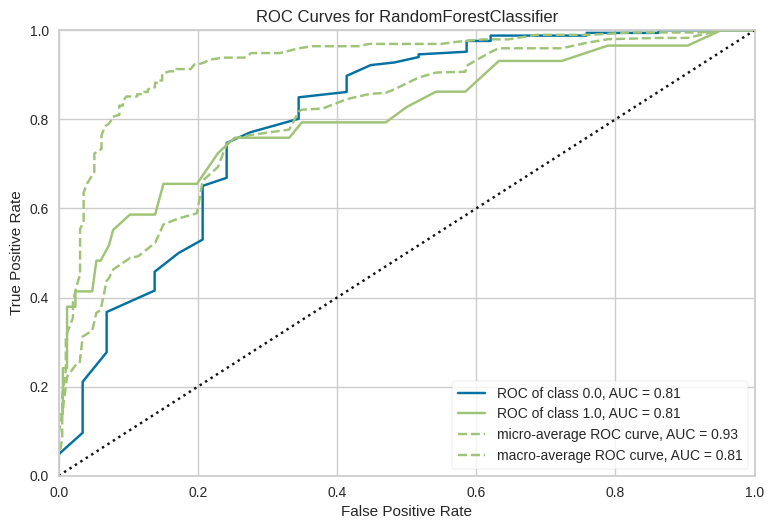

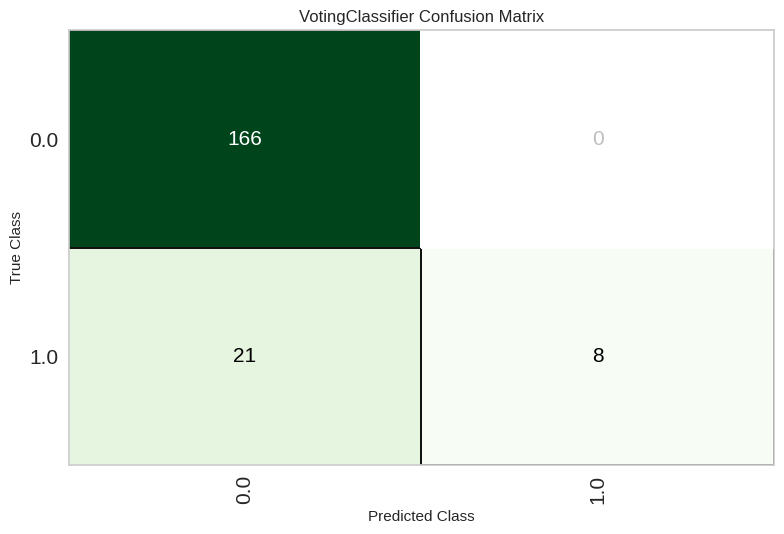

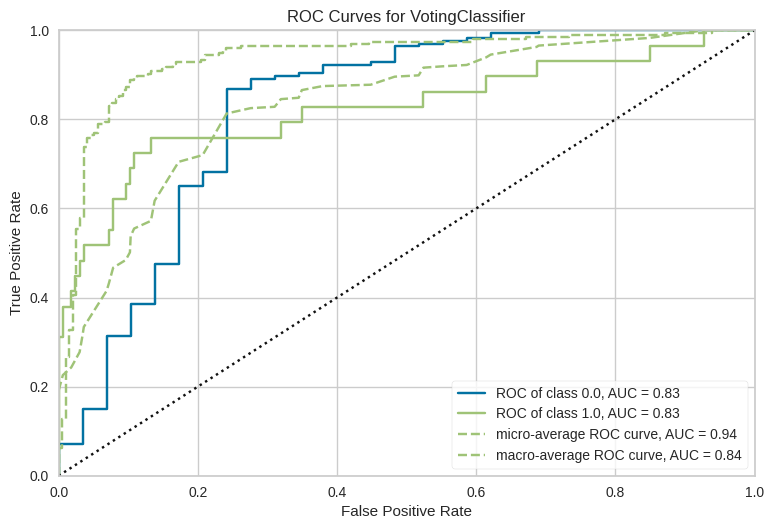

In [ ]:
# ROC curve and auc value
plot_model(lr, plot= 'confusion_matrix')
plot_model(lr, plot= 'auc')
# ROC curve and auc value
plot_model(lightgbm, plot= 'confusion_matrix')
plot_model(lightgbm, plot= 'auc')
# ROC curve and auc value
plot_model(rf, plot= 'confusion_matrix')
plot_model(rf, plot= 'auc')
# ROC curve and auc value
plot_model(blender, plot= 'confusion_matrix')
plot_model(blender, plot= 'auc')

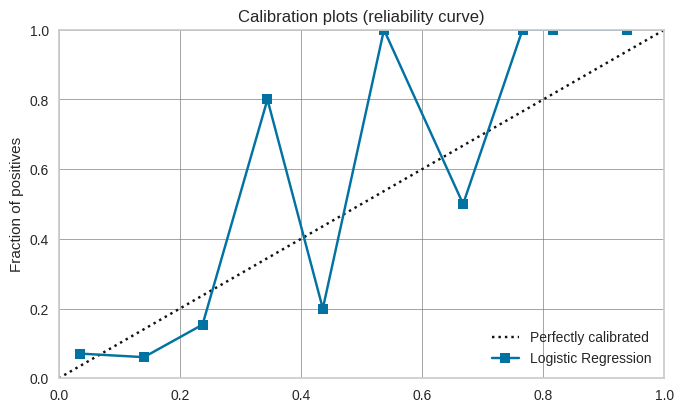

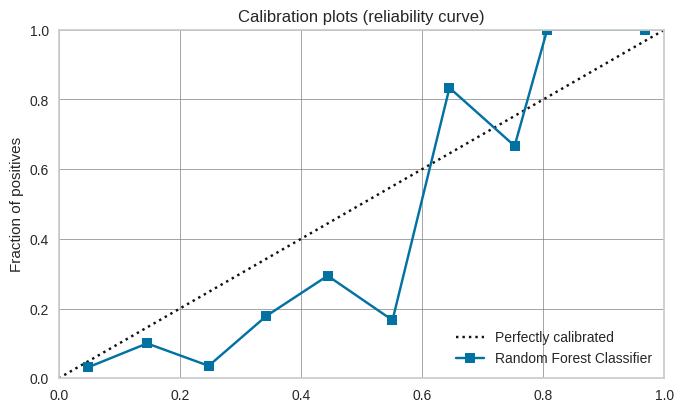

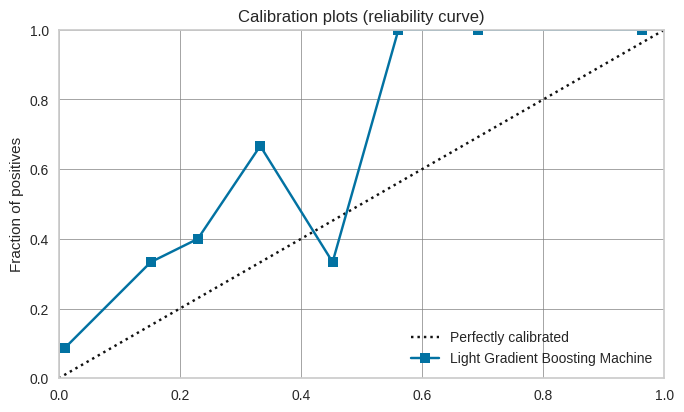

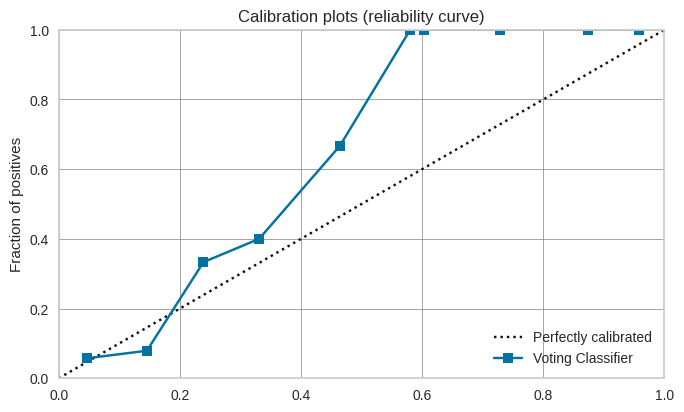

In [ ]:
# calibration plot

plot_model(lr, plot= 'calibration')
plot_model(rf, plot= 'calibration')
plot_model(lightgbm, plot= 'calibration')
plot_model(blender, plot= 'calibration')

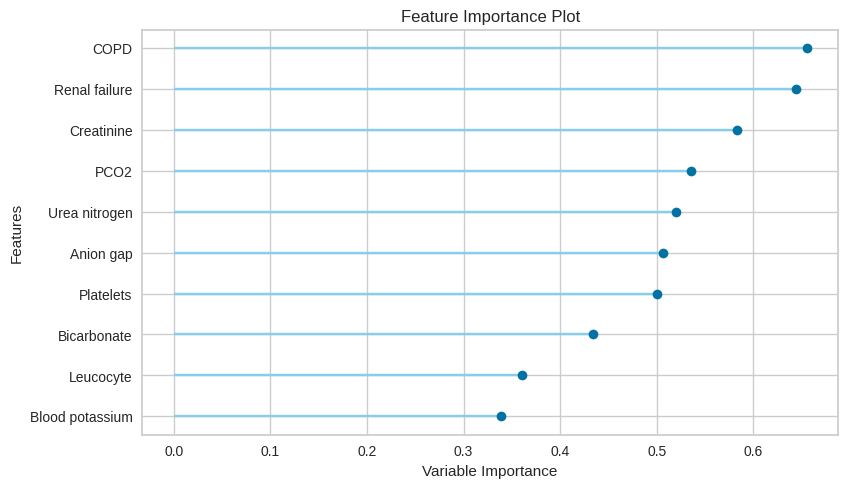

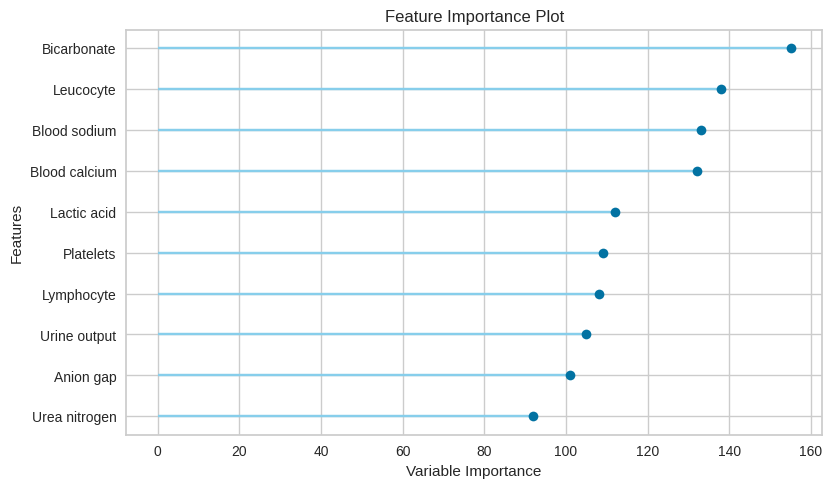

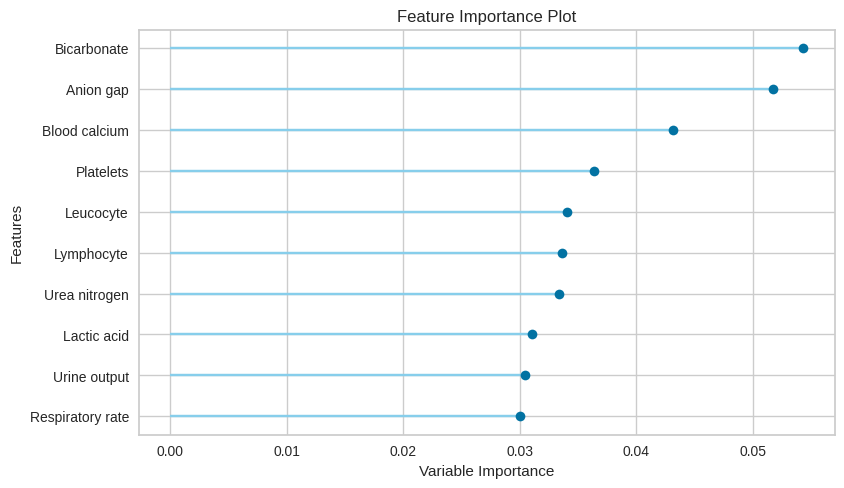

In [ ]:
# Feature Importance (Top 10)
plot_model(lr, plot= 'feature')
plot_model(lightgbm, plot= 'feature')
plot_model(rf, plot= 'feature')



In [ ]:
# parameters
plot_model(rf, plot= 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


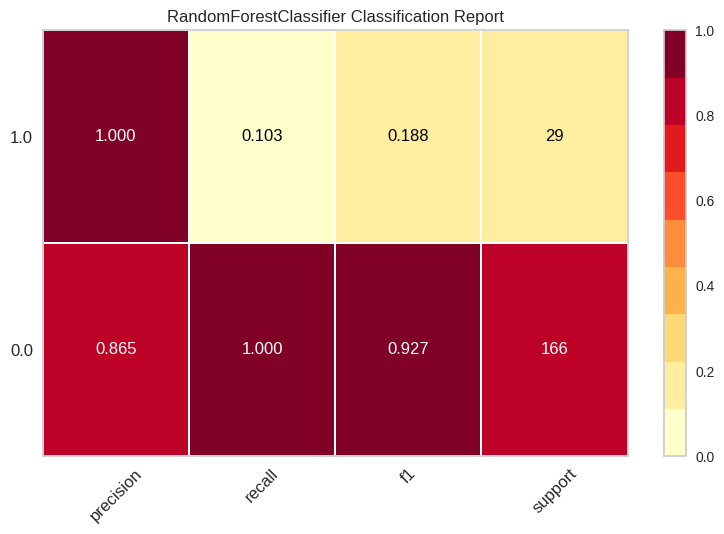

In [ ]:
# Classification Report
plot_model(rf, plot= 'class_report')

In [ ]:
# performance on test data set
predict_model(lr)
predict_model(lightgbm)
predict_model(rf)
predict_model(blender)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8974,0.7973,0.3448,0.9091,0.5000,0.4555,0.5225


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8872,0.7960,0.2414,1.0000,0.3889,0.3514,0.4617


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8667,0.8059,0.1034,1.0000,0.1875,0.1642,0.2991


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8923,0.8255,0.2759,1.0000,0.4324,0.3934,0.4949


,group,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,outcome,prediction_label,prediction_score
747,2,47,1,47.404846,1,0,0,1,0,0,...,14.285714,2.142857,7.360769,37.142857,1.600000,75.384613,55,0.0,0,0.9494
584,1,83,1,31.741531,1,1,0,1,0,0,...,14.000000,2.244444,7.430000,22.375000,2.700000,30.000000,55,0.0,0,0.8404
654,1,79,2,27.986168,1,1,0,1,0,0,...,14.181818,2.309091,7.391539,26.363636,4.571429,48.272728,25,1.0,0,0.9194
240,1,47,1,53.374763,1,0,0,1,1,1,...,11.428572,1.971429,7.328182,30.000000,1.400000,64.000000,55,0.0,0,0.9917
972,2,78,1,25.822710,0,1,0,1,0,1,...,18.160000,2.012500,NaN,20.480000,NaN,NaN,30,0.0,0,0.8760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,1,65,1,23.351706,0,0,0,0,0,0,...,10.933333,2.315385,7.436666,32.133335,1.200000,45.500000,50,0.0,0,0.9014
477,1,61,1,33.921585,1,0,0,0,0,0,...,10.500000,2.154546,7.388000,39.500000,2.066667,57.599998,55,0.0,0,0.9991
482,1,42,2,27.765713,0,0,0,0,1,1,...,9.666667,1.914286,7.374615,24.266666,2.100000,38.250000,55,0.0,0,0.8595
845,2,88,1,23.307018,1,1,0,1,0,0,...,11.111111,2.070000,NaN,34.222221,2.400000,NaN,30,0.0,0,0.9693


## External Validation

In [ ]:
# data load
data_path_url_2 = "https://docs.google.com/spreadsheets/d/1oUeqa-L7fOifjywaDJkKeim-lVNQjvwK/edit?usp=share_link&ouid=115767054129572266797&rtpof=true&sd=true"
data_path_url_for_pandas_2 = data_path_url_2.replace("/edit?usp=share_link&ouid=115767054129572266797&rtpof=true&sd=true", "/export?format=xlsx")
df_external = pd.read_excel(data_path_url_for_pandas_2)

In [ ]:
# performance on test data set
predict_model(lr, data = df_external)
predict_model(lightgbm, data = df_external)
predict_model(rf, data = df_external)
predict_model(blender, data = df_external)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9154,0.6849,0.2667,0.4000,0.3200,0.2768,0.2833


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9254,0.7900,0.2000,0.5000,0.2857,0.2539,0.2839


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9303,0.8522,0.0667,1.0000,0.1250,0.1168,0.2490


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9303,0.8186,0.2000,0.6000,0.3000,0.2729,0.3193


,group,ID,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,outcome,prediction_label,prediction_score
0,1,168686,62,2,30.273499,0,0,0,0,0,...,10.500000,1.987500,NaN,37.375000,NaN,NaN,55,0,0,0.9661
1,1,185666,69,2,31.688951,1,1,0,0,0,...,11.500000,2.214286,NaN,25.666666,NaN,NaN,55,0,0,0.9045
2,1,190558,64,1,33.055557,1,0,0,0,0,...,13.500000,2.150000,NaN,24.666666,NaN,NaN,50,0,0,0.9339
3,1,174954,89,1,23.389231,1,1,0,0,0,...,13.625000,2.483333,7.360000,24.500000,NaN,39.000000,55,0,0,0.9799
4,1,116969,76,1,25.104124,0,0,0,0,0,...,13.000000,2.187500,7.490000,24.125000,NaN,33.000000,55,1,0,0.7259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2,195771,79,2,NaN,1,0,0,1,1,...,14.625000,2.283333,NaN,29.250000,1.450000,NaN,55,0,0,0.9946
197,2,182873,86,2,25.409887,1,0,0,0,0,...,12.727273,2.466667,7.440625,27.000000,1.450000,47.625000,55,0,0,0.7701
198,2,143085,53,2,29.411764,1,0,0,1,0,...,19.700001,2.066667,7.290000,18.600000,1.450000,42.000000,35,1,0,0.6844
199,2,145745,85,1,27.968424,1,0,0,0,0,...,14.428572,2.457143,7.465000,26.142857,1.466667,40.750000,55,0,0,0.8348


## Save model

In [ ]:
# save pipeline
save_model(blender, 'blender_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['group', 'age', 'gendera', 'BMI',
                                              'hypertensive',
                                              'atrialfibrillation',
                                              'CHD with no MI', 'diabetes',
                                              'deficiencyanemias', 'depression',
                                              'Hyperlipemia', 'Renal failure',
                                              'COPD', 'heart rate',
                                              'Systolic blood pressure',
                                              'Diastolic blood pressure',
                                              'Respiratory rate', 'te...
                                                                       criterion='gini',
                                               

# END